# Case Study - Marketing Analysis for Term Deposit

Leveraging customer information is paramount for most businesses. In the case of a bank, attributes of customers like the ones mentioned below can be crucial in strategizing a marketing campaign when launching a new product.

Problem Statement:

The classification goal is to predict if the client will subscribe (yes/no) to a term deposit (variable Target).

# Import all necessary modules and load the data

In [37]:
!pip install imblearn
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

1. Background
    The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) was subscribed or not. Data set has 17 predictor variables (features) and around 45,211 rows. Top 5 rows of the dataset is shown below.

In [38]:
import csv
import os.path

userhome = os.path.expanduser('~')
csvfile= os.path.join(userhome, 'Desktop', 'bank-full.csv')
open(csvfile, "r")

<_io.TextIOWrapper name='/Users/dharitridalvi/Desktop/bank-full.csv' mode='r' encoding='UTF-8'>

In [67]:
df = pd.read_csv('/Users/dharitridalvi/Desktop/bank-full.csv')
data = pd.read_csv('/Users/dharitridalvi/Desktop/bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [40]:
print(df.shape) # prints data shape
print(df.columns)

(45211, 17)
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [42]:
df.isna().apply(pd.value_counts) 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
False,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211


In [43]:
print("Any missing sample in data:",df.isnull().values.any())

Any missing sample in data: False


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


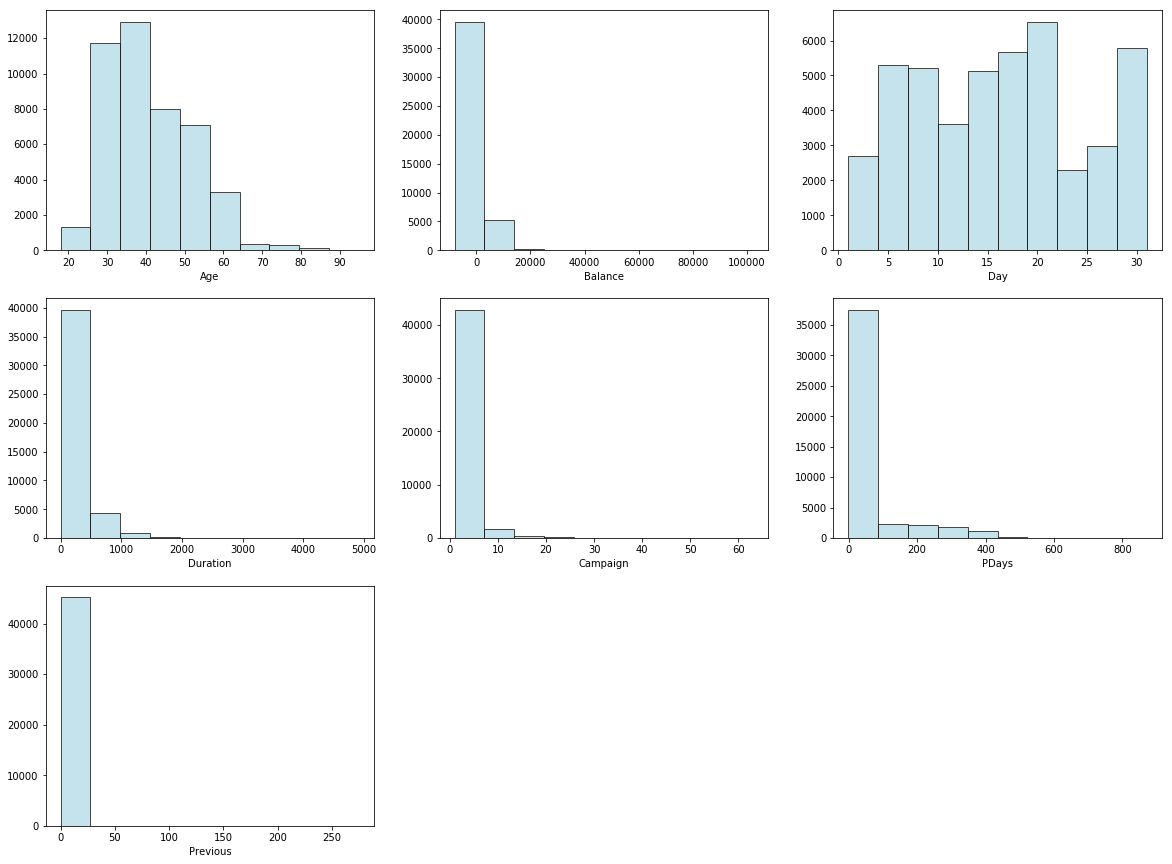

In [45]:
#Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.age, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Age')

plt.subplot(3,3,2)
plt.hist(df.balance, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Balance')

plt.subplot(3,3,3)
plt.hist(df.day, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Day')

plt.subplot(3,3,4)
plt.hist(df.duration, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Duration')

plt.subplot(3,3,5)
plt.hist(df.campaign, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Campaign')

plt.subplot(3,3,6)
plt.hist(df.pdays, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('PDays')

plt.subplot(3,3,7)
plt.hist(df.previous, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Previous')

plt.show()

In [46]:
data1 = df[df['Target'] == 'yes']
data2 = df[df['Target'] == 'no']

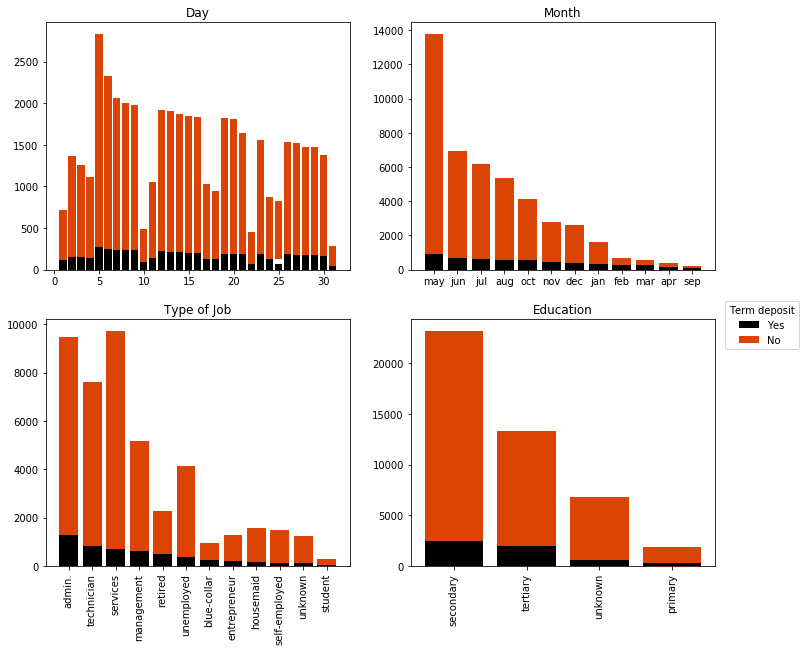

In [47]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))

b1 = ax[0, 0].bar(data1['day'].unique(),height = data1['day'].value_counts(),color='#000000')
b2 = ax[0, 0].bar(data2['day'].unique(),height = data2['day'].value_counts(),bottom = data1['day'].value_counts(),color = '#DC4405') 
ax[0, 0].title.set_text('Day')
#ax[0, 0].legend((b1[0], b2[0]), ('Yes', 'No'))
ax[0, 1].bar(data1['month'].unique(),height = data1['month'].value_counts(),color='#000000')
ax[0, 1].bar(data2['month'].unique(),height = data2['month'].value_counts(),bottom = data1['month'].value_counts(),color = '#DC4405') 
ax[0, 1].title.set_text('Month')
ax[1, 0].bar(data1['job'].unique(),height = data1['job'].value_counts(),color='#000000')
ax[1, 0].bar(data1['job'].unique(),height = data2['job'].value_counts()[data1['job'].value_counts().index],bottom = data1['job'].value_counts(),color = '#DC4405') 
ax[1, 0].title.set_text('Type of Job')
ax[1, 0].tick_params(axis='x',rotation=90)
ax[1, 1].bar(data1['education'].unique(),height = data1['education'].value_counts(),color='#000000') #row=0, col=1
ax[1, 1].bar(data1['education'].unique(),height = data2['education'].value_counts()[data1['education'].value_counts().index],bottom = data1['education'].value_counts(),color = '#DC4405') 
ax[1, 1].title.set_text('Education')
ax[1, 1].tick_params(axis='x',rotation=90)
#ax[0, 1].xticks(rotation=90)
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

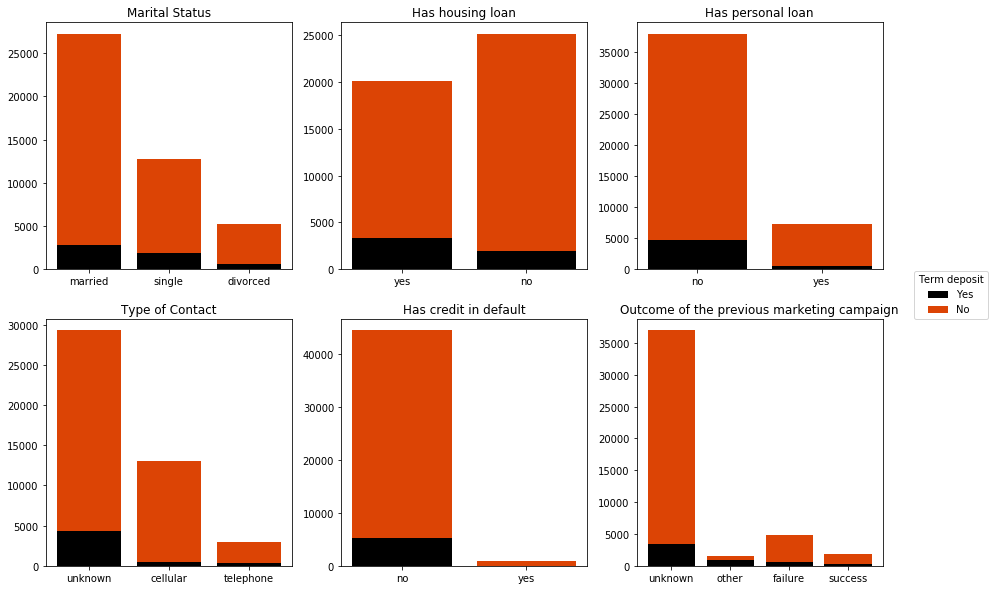

In [48]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))

b1 = ax[0, 0].bar(data1['marital'].unique(),height = data1['marital'].value_counts(),color='#000000')
b2 = ax[0, 0].bar(data1['marital'].unique(),height = data2['marital'].value_counts()[data1['marital'].value_counts().index],bottom = data1['marital'].value_counts(),color = '#DC4405') 
ax[0, 0].title.set_text('Marital Status')
#ax[0, 0].legend((b1[0], b2[0]), ('Yes', 'No'))
ax[0, 1].bar(data1['housing'].unique(),height = data1['housing'].value_counts(),color='#000000')
ax[0, 1].bar(data1['housing'].unique(),height = data2['housing'].value_counts()[data1['housing'].value_counts().index],bottom = data1['housing'].value_counts(),color = '#DC4405') 
ax[0, 1].title.set_text('Has housing loan')
ax[0, 2].bar(data1['loan'].unique(),height = data1['loan'].value_counts(),color='#000000')
ax[0, 2].bar(data1['loan'].unique(),height = data2['loan'].value_counts()[data1['loan'].value_counts().index],bottom = data1['loan'].value_counts(),color = '#DC4405') 
ax[0, 2].title.set_text('Has personal loan')
ax[1, 0].bar(data1['contact'].unique(),height = data1['contact'].value_counts(),color='#000000')
ax[1, 0].bar(data1['contact'].unique(),height = data2['contact'].value_counts()[data1['contact'].value_counts().index],bottom = data1['contact'].value_counts(),color = '#DC4405') 
ax[1, 0].title.set_text('Type of Contact')
ax[1, 1].bar(data1['default'].unique(),height = data1['default'].value_counts(),color='#000000')
ax[1, 1].bar(data1['default'].unique(),height = data2['default'].value_counts()[data1['default'].value_counts().index],bottom = data1['default'].value_counts(),color = '#DC4405') 
ax[1, 1].title.set_text('Has credit in default')
ax[1, 2].bar(data1['poutcome'].unique(),height = data1['poutcome'].value_counts(),color='#000000')
ax[1, 2].bar(data1['poutcome'].unique(),height = data2['poutcome'].value_counts()[data1['poutcome'].value_counts().index],bottom = data1['poutcome'].value_counts(),color = '#DC4405') 
ax[1, 2].title.set_text('Outcome of the previous marketing campaign')
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

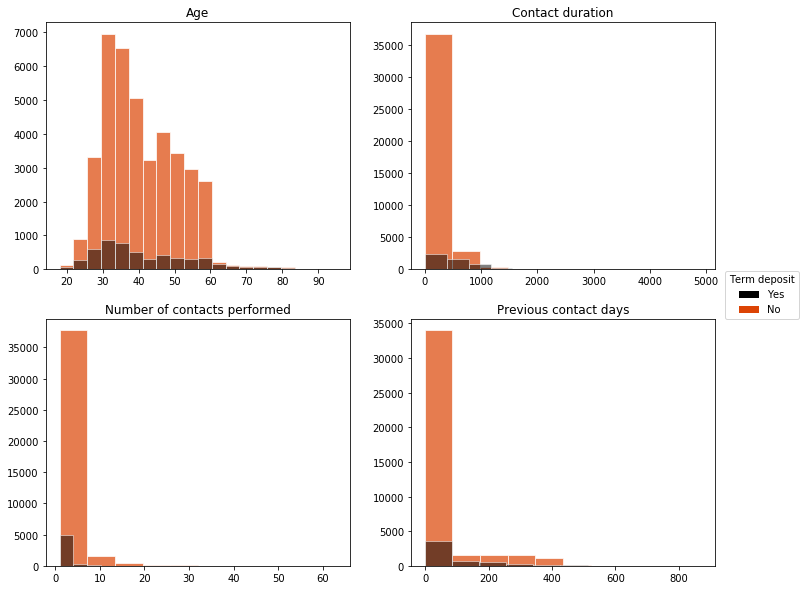

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))

ax[0, 0].hist(data2['age'],color = '#DC4405',alpha=0.7,bins=20, edgecolor='white') 
ax[0, 0].hist(data1['age'],color='#000000',alpha=0.5,bins=20, edgecolor='white')
ax[0, 0].title.set_text('Age')
ax[0, 1].hist(data2['duration'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[0, 1].hist(data1['duration'],color='#000000',alpha=0.5, edgecolor='white')
ax[0, 1].title.set_text('Contact duration')
ax[1, 0].hist(data2['campaign'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[1, 0].hist(data1['campaign'],color='#000000',alpha=0.5, edgecolor='white')
ax[1, 0].title.set_text('Number of contacts performed')
ax[1, 1].hist(data2[data2['pdays'] != 999]['pdays'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[1, 1].hist(data1[data1['pdays'] != 999]['pdays'],color='#000000',alpha=0.5, edgecolor='white')
ax[1, 1].title.set_text('Previous contact days')
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

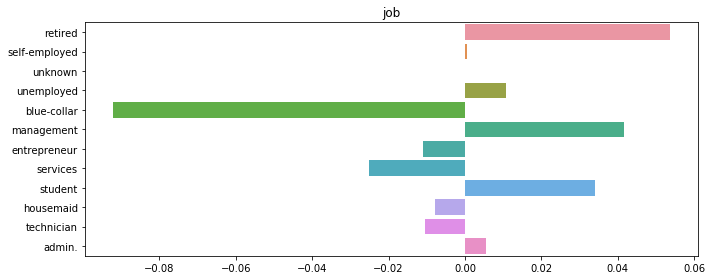

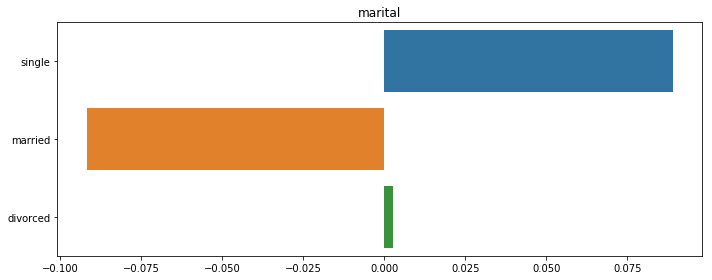

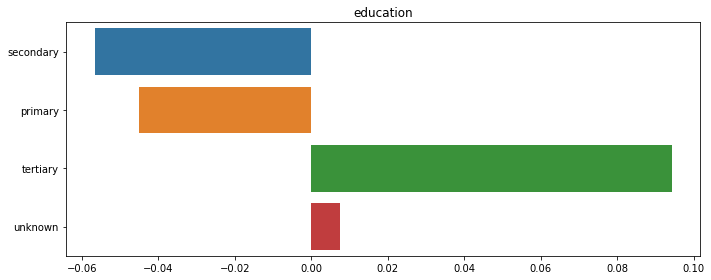

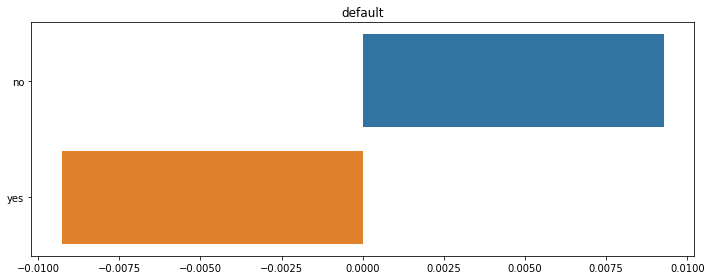

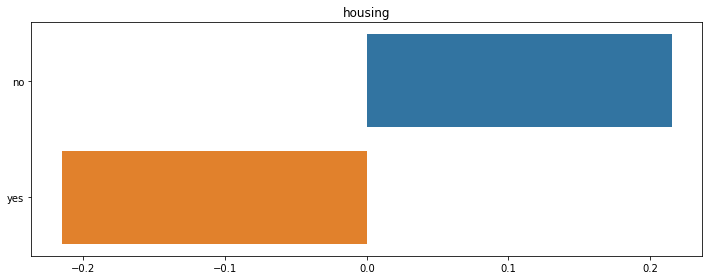

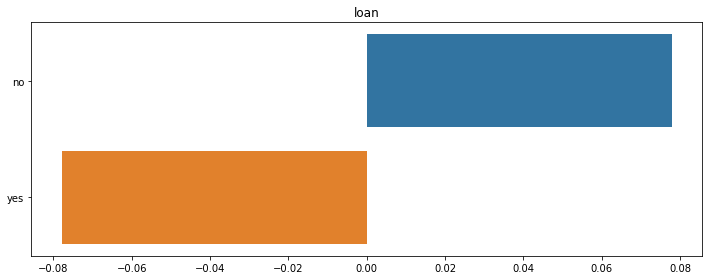

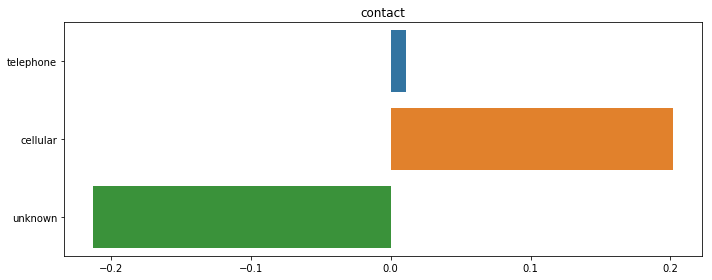

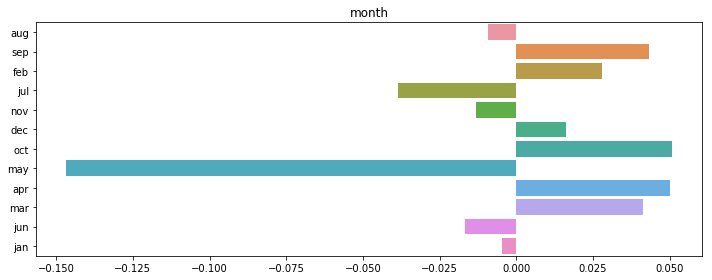

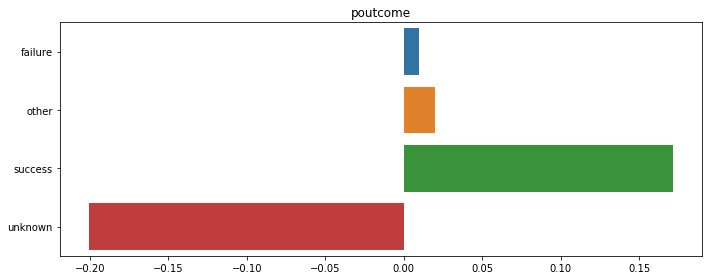

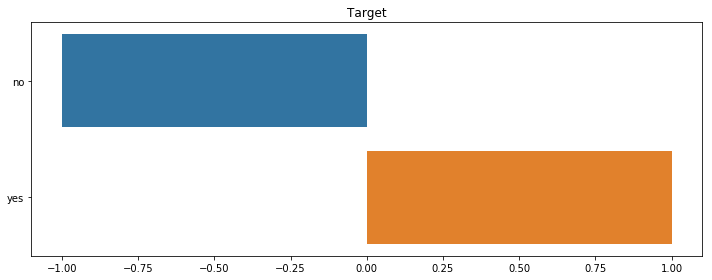

In [49]:
categorical_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','Target']
for col in categorical_variables:
    plt.figure(figsize=(10,4))
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = df.loc[df.Target.values == 'yes', col].value_counts() 
    neg_counts = df.loc[df.Target.values == 'no', col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    #Counts of how often each outcome was recorded.
    freq_pos = (df.Target.values == 'yes').sum()
    freq_neg = (df.Target.values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()

Normalized distribution of each class per feature and plotted difference between positive and negative frequencies. Positive values imply this category favors clients that will subscribe and negative values categories that favor not buying the product.





In [50]:
df["Target"].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [51]:
df["Target"].value_counts()/len(data.Target)

no     0.883015
yes    0.116985
Name: Target, dtype: float64

# Understanding graphs


88% of the observations are 'No' as compared to just 11 % of the data which is 'Yes'. Clearly, this is an imbalanced dataset.

There are missing values so we need to impute it.

Features need to be preprocessed.

Some Important features are

1. Job
2. Education (Literate people i.e passing secondary education seems to get convinced by campaign)
3. Months (Seasonal effect can been seen in the data. In may, the sales seem to have increased)
4. Previous outcome seems important because new customers seems to convert more
5. Average age of people who converted
6. People who converted were exposed to fewer campaigns than those who didn't
7. Duration

This imbalance has to be treated so as to make sure that there is no bias in modeling. 

In [70]:
df.drop(["duration"] , axis=1,inplace=True)
df.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
campaign         0
pdays            0
previous         0
poutcome     36959
Target           0
dtype: int64

In [68]:
df1=df.replace('unknown',np.NaN,inplace=True)

In [69]:
df.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
Target           0
dtype: int64

In [55]:
##Replaced 'unknown' with NaN to see the count of unknown values.

Four columns have unknown values including the outcome column. 

Imputation:

Now, to infer the missing values in 'job' and 'education', we make use of the cross-tabulation between 'job' and 'education'. the hypothesis here is that 'job' is influenced by the 'education' of a person. Hence, we can infer 'job' based on the education of the person. Moreover, since we are just filling the missing values, we are not much concerned about the causal inference. We, therefore, can use the job to predict the education.

In [71]:
def cross_tab(data,f1,f2):
    jobs=list(data[f1].unique())
    edu=list(data[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=data[data[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

In [72]:
cross_tab(data,'job','education')

,tertiary,secondary,unknown,primary
job,,,,
admin.,572,4219,171,209
blue-collar,149,5371,454,3758
entrepreneur,686,542,76,183
housemaid,173,395,45,627
management,7801,1121,242,294
retired,366,984,119,795
self-employed,833,577,39,130
services,202,3457,150,345
student,223,508,163,44


In [73]:
data['job'][data['age']>60].value_counts()

retired          875
management       105
housemaid         56
technician        30
blue-collar       26
admin.            25
self-employed     24
unknown           22
entrepreneur      13
unemployed        10
services           2
Name: job, dtype: int64

Inferring education from jobs : From the cross-tabulation, it can be seen that people with management jobs usually have a university degree. Hence wherever 'job' = management and 'education' = nan, we can replace 'education' with 'tertiary'. Similarly, 'job' = 'services' --> 'education' = 'secondary' and 'job' = 'housemaid' --> 'education' = 'primary'.

Inferring jobs from education : If 'education' = 'primary' or 'secondary' then the 'job' is usually 'blue-collar'. If 'education' = 'tertiary', then the 'job' = 'technician'.

Inferring jobs from age: As we see, if 'age' > 60, then the 'job' is 'retired,' which makes sense.

While imputing the values for job and education, we were cognizant of the fact that the correlations should make real world sense. If it didn't make real world sense, we didn't replace the missing values.

In [75]:
data.loc[(data['age']>60) & (data['job']=='unknown'), 'job'] = 'retired'
data.loc[(data['education']=='unknown') & (data['job']=='management'), 'education'] = 'tertiary'
data.loc[(data['education']=='unknown') & (data['job']=='services'), 'education'] = 'secondary'
data.loc[(data['education']=='unknown') & (data['job']=='housemaid'), 'education'] = 'primary'
data.loc[(data['job'] == 'unknown') & (data['education']=='primary'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='primary'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='primary'), 'job'] = 'blue-collar'
data.loc[(data['job']=='unknown') & (data['education']=='tertiary'), 'job'] = 'technician'

In [76]:
cross_tab(data,'job','education')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,tertiary,secondary,unknown,primary
admin.,572.0,4219,171.0,209.0
blue-collar,149.0,5371,454.0,3808.0
entrepreneur,686.0,542,76.0,183.0
housemaid,173.0,395,0.0,672.0
management,8043.0,1121,0.0,294.0
retired,371.0,989,130.0,796.0
self-employed,833.0,577,39.0,130.0
services,202.0,3607,0.0,345.0
student,223.0,508,163.0,44.0
technician,2002.0,5229,242.0,158.0



As you can see, we are able to reduce the number of unknowns and enhance our data set.

In [77]:
jobhousing=cross_tab(data,'job','housing')
jobloan=cross_tab(data,'job','loan')

Imputations for housing and loan: 

We are using cross-tabulation between 'housing' and 'job' and between 'loan' and 'job.' 

The hypothesis is that housing loan status (Yes or No) should be in the proportion with each job category. Hence, using the prior known distribution of the housing loan for each job category, the housing loan for unknown people will be predicted such that the prior distribution (% Housing = Yes's and No's for each job category remains the same). Similarly, we have filled the missing values in the 'loan' variable.

In [78]:
def fillhousing(data,jobhousing):
    """Function for imputation via cross-tabulation to fill missing values for the 'housing' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    house=["no","yes"]
    for j in jobs:
        ind=data[np.logical_and(np.array(data['housing']=='unknown'),np.array(data['job']==j))].index
        mask=np.random.rand(len(ind))<((jobhousing.loc[j]['no'])/(jobhousing.loc[j]['no']+jobhousing.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        data.loc[ind1,"housing"]='no'
        data.loc[ind2,"housing"]='yes'
    return data

In [79]:
def fillloan(data,jobloan):
    """Function for imputation via cross-tabulation to fill missing values for the 'loan' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    loan=["no","yes"]
    for j in jobs:
        ind=data[np.logical_and(np.array(data['loan']=='unknown'),np.array(data['job']==j))].index
        mask=np.random.rand(len(ind))<((jobloan.loc[j]['no'])/(jobloan.loc[j]['no']+jobloan.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        data.loc[ind1,"loan"]='no'
        data.loc[ind2,"loan"]='yes'
    return data

In [80]:
data=fillhousing(data,jobhousing)

In [81]:
data=fillloan(data,jobloan)

In [82]:
numerical_variables = ['age','campaign', 'pdays', 'previous', 'day']
data[numerical_variables].describe()

,age,campaign,pdays,previous,day
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,2.763841,40.197828,0.580323,15.806419
std,10.618762,3.098021,100.128746,2.303441,8.322476
min,18.000000,1.000000,-1.000000,0.000000,1.000000
25%,33.000000,1.000000,-1.000000,0.000000,8.000000
50%,39.000000,2.000000,-1.000000,0.000000,16.000000
75%,48.000000,3.000000,-1.000000,0.000000,21.000000
max,95.000000,63.000000,871.000000,275.000000,31.000000


In [83]:
pd.crosstab(data['pdays'],data['poutcome'], values=data['age'], aggfunc='count', normalize=True)

poutcome,failure,other,success,unknown
pdays,,,,
-1,0.000000,0.000000,0.000000,0.817367
1,0.000066,0.000066,0.000199,0.000000
2,0.000022,0.000774,0.000022,0.000000
3,0.000000,0.000022,0.000000,0.000000
4,0.000022,0.000000,0.000022,0.000000
5,0.000022,0.000199,0.000022,0.000000
6,0.000022,0.000155,0.000044,0.000000
7,0.000022,0.000111,0.000022,0.000000
8,0.000044,0.000509,0.000000,0.000000


As we can see from the above table, the majority of the values for 'pdays' are missing. The majority of these missing values occur when the 'poutcome' is 'unknown'. This means that the majority of the values in 'pdays' are missing because the customer was never contacted before. To deal with this variable, we removed the numerical variable 'pdays' and replaced it with categorical variables with following categories: p_days_missing, pdays_less_5, pdays_bet_5_15, and pdays_greater_15.

In [84]:
#Add new categorical variables to our dataframe.
data['pdays_missing'] = 0
data['pdays_less_5'] = 0
data['pdays_greater_15'] = 0
data['pdays_bet_5_15'] = 0
data['pdays_missing'][data['pdays']==-1] = 1
data['pdays_less_5'][data['pdays']<5] = 1
data['pdays_greater_15'][(data['pdays']>15) & (data['pdays']<999)] = 1
data['pdays_bet_5_15'][(data['pdays']>=5)&(data['pdays']<=15)]= 1
data_dropped_pdays = data.drop('pdays', axis=1);

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [85]:
data_with_dummies=pd.get_dummies(data_dropped_pdays)

In [86]:
def dropfeature(data,f):
    """Drops one of the dummy variables."""
    data=data.drop(f,axis=1)
    return data

In [87]:
features_dropped = ['default_no','housing_no','loan_no','Target_no','marital_single','contact_cellular',
                    'education_unknown','job_unknown', 'pdays_less_5']
data_clean = dropfeature(data_with_dummies, features_dropped)

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 47 columns):
age                    45211 non-null int64
balance                45211 non-null int64
day                    45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
previous               45211 non-null int64
pdays_missing          45211 non-null int64
pdays_greater_15       45211 non-null int64
pdays_bet_5_15         45211 non-null int64
job_admin.             45211 non-null uint8
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
marital_div

In [88]:
def drawheatmap(data):
    '''Builds the heat map for the given data'''
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(data.corr(method='spearman'), annot=False, cmap='coolwarm')
    
def drawhist(data,feature):
    '''Draws an histogram for a feature in a data frame (data)'''
    plt.hist(data[feature])

def functionreplace(data,fea,val1,val2):
    '''Replaces value (val1) with value (val2) in the data frame (data) for a feature (fea)'''
    data[fea].replace(val1,val2)
    return data

def drawbarplot(df,x,y):
    '''Draws a bar plot for a given feature x and y in a data frame'''
    sns.barplot(x=x, y=y, data=data)

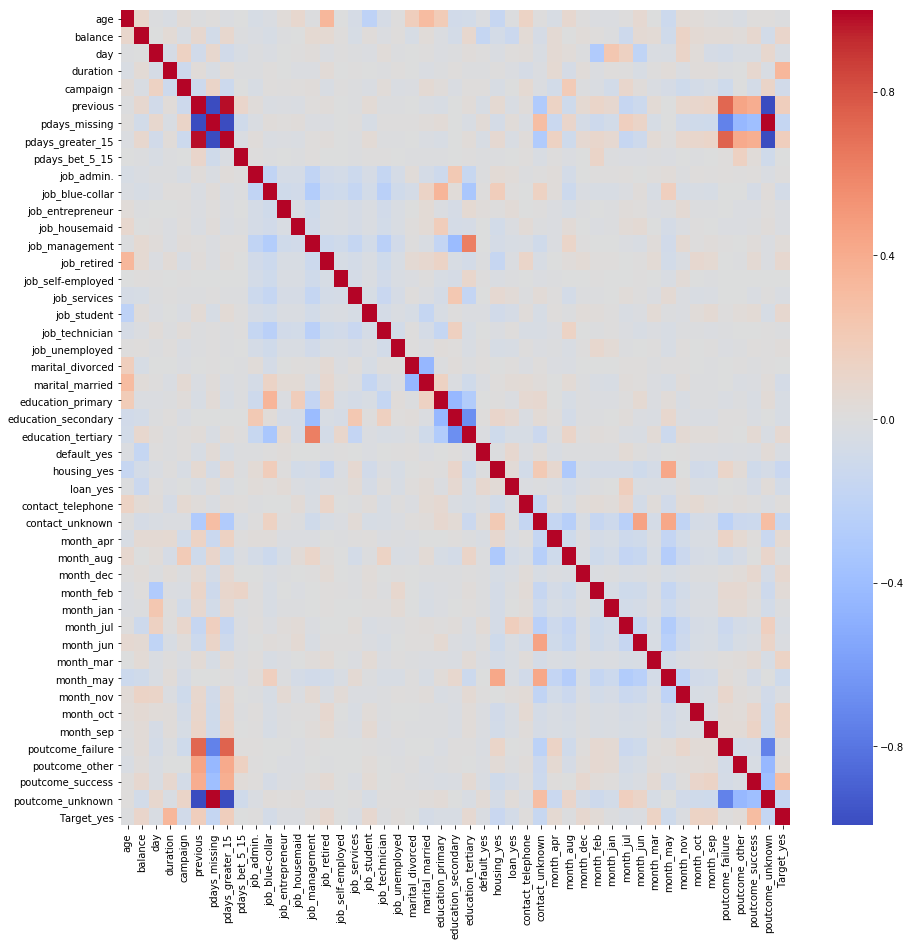

In [89]:
drawheatmap(data_clean)

Inferences: 

From the above heat map we can see that 'target_yes' (our target variable) has good correlation with 'previous', 'pdays_missing', 'poutcome_success' , 'duration', 'poutcome_unknown'and 'pdays_greater_15'. We expect to see these independent variables as significant while building the models.

# Model Building and Evaluation




Train Test Split : First we start with splitting the data into training and testing. For all the models, five-fold cross validation will be used.

Used stratification (keeping the target distribution unchanged) since dataset is highly imbalanced. A random train/test split will probably change the target distribution quite a bit.

In [90]:
def keep_cols(data, keep_these):
    """Keep only the columns [keep_these] in a DataFrame, delete
    all other columns. 
    """
    drop_these = list(set(list(data)) - set(keep_these))
    return data.drop(drop_these, axis = 1)

In [91]:
data1 = data.pipe(keep_cols, ['age','previous','pdays','poutcome','duration','housing','loan','job','Target'])
data1.head()

,age,job,housing,loan,duration,pdays,previous,poutcome,Target
0,58,management,yes,no,261,-1,0,unknown,no
1,44,technician,yes,no,151,-1,0,unknown,no
2,33,entrepreneur,yes,yes,76,-1,0,unknown,no
3,47,blue-collar,yes,no,92,-1,0,unknown,no
4,33,unknown,no,no,198,-1,0,unknown,no


In [92]:
predictors = data1.iloc[:,0:8]
y = data1.iloc[:,8]
X = pd.get_dummies(predictors)

In [93]:
np.unique(y)

array(['no', 'yes'], dtype=object)

In [111]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_clean, train_size=0.8, random_state=5)
print('Original:', (data_clean.Target_yes).mean(), 'Train:', (train.Target_yes).mean(), 'Test:', (test.Target_yes).mean())

train, test = train_test_split(data_clean, train_size=0.8, stratify=data_clean.Target_yes.values, random_state=5)
print('Original:', (data_clean.Target_yes).mean(), 'Train:', (train.Target_yes).mean(), 'Test:', (test.Target_yes).mean())

Original: 0.11698480458295547 Train: 0.11731364742313648 Test: 0.11566957867964171
Original: 0.11698480458295547 Train: 0.11698186241981863 Test: 0.11699657193409267


# Perceptron




Simple linear classifier is fitted on the imbalanced data. Model is highly biased towards 'no' class. Accuracy is high for this model which is expected for imbalanced data.

In [105]:
import sklearn.linear_model as lm

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize

from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
perp_model = lm.Perceptron().fit(X_train_std,y_train)
y_pred = perp_model.predict(X_test_std)
print("Accuracy: ",round(accuracy_score(y_test, y_pred),2))

Accuracy:  0.83


Confusion matrix gives a better idea. Categorization of minority 'yes' class is far from perfect which is indicated by poor precision score and recall score.

In [138]:
mat = confusion_matrix(y_test,y_pred,labels=['no','yes'])
print(mat)
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))

[[10561  1465]
 [  822   716]]
Precision:  0.33 Recall:  0.47


SMOTE - Synthetic Minority Oversampling Technique

This is an oversampling technique in which instead of randomly repeating minority 'yes' category, new entires are sythetically created maintaining the convexity of minority entry space. Minority category will again match the majority category samples.

In [139]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
sm = SMOTE(random_state=0)
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)
pd.Series(y_SMOTE).value_counts()

yes    39922
no     39922
dtype: int64

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
sm = SMOTE(random_state=0)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
sc = StandardScaler()
sc.fit(X_SMOTE)
X_train_std = sc.transform(X_SMOTE)
X_test_std = sc.transform(X_test)
perp_model = lm.Perceptron().fit(X_train_std,y_SMOTE)
y_pred = perp_model.predict(X_test_std)
print("Accuracy: ",round(accuracy_score(y_test, y_pred),2))
mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",mat)
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))

Accuracy:  0.78
Confusion Matrix: 
 [[9956 2001]
 [ 929  678]]
Precision:  0.25 Recall:  0.42


# Decision Tree

Decision tree is another simple yet powerful classification tool. But this model faces the same problem of bad precision score and bad recall score for imbalanced data.

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
tree = DecisionTreeClassifier(criterion="entropy", max_depth=7)
model = tree.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))

Precision:  0.63 Recall:  0.34


In [142]:
print("Accuracy: ",round(accuracy_score(y_test, y_pred),2))

Accuracy:  0.9


When decision tree is fit on SMOTE data, recall score improves but precision score deteriorates.

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
tree = DecisionTreeClassifier(criterion="entropy", max_depth=7)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
model = tree.fit(X_SMOTE,y_SMOTE)
y_pred = model.predict(X_test)
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))

Precision:  0.38 Recall:  0.69


In [144]:
print("Accuracy: ",round(accuracy_score(y_test, y_pred),2))

Accuracy:  0.83



# Random Forest




Random forest is an ensemble technique which reduces the variance in the classification technique. But this classification worsens the bias that is already in the data. Random forest performs badly in terms of precision and recall when applied on imbalanced data.

In [145]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
forest = RandomForestClassifier(n_estimators= 1000,criterion="gini", max_depth=5,min_samples_split = 0.4,min_samples_leaf=1, class_weight="balanced")
model = forest.fit(X_train,y_train)
y_pred = model.predict(X_test)
pd.Series(y_pred).value_counts()
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))

Precision:  0.31 Recall:  0.8


In [146]:
print("Accuracy: ",round(accuracy_score(y_test, y_pred),2))

Accuracy:  0.76


Random forest classification hardly performs better when applied on SMOTE data in terms of precision and recall.

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
forest = RandomForestClassifier(n_estimators= 1000,criterion="gini", max_depth=5,min_samples_split = 0.4,min_samples_leaf=1, class_weight="balanced")
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
model = forest.fit(X_SMOTE,y_SMOTE)
y_pred = model.predict(X_test)
pd.Series(y_pred).value_counts()
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))

Precision:  0.31 Recall:  0.61


In [150]:
print("Accuracy: ",round(accuracy_score(y_test, y_pred),2))

Accuracy:  0.8


# Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [151]:
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
Adaboost = AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22)
model = Adaboost.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))

Precision:  0.69 Recall:  0.22


In [152]:
print("Accuracy: ",round(accuracy_score(y_test, y_pred),2))

Accuracy:  0.9


In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
adaboost = AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
model = adaboost.fit(X_SMOTE,y_SMOTE)
y_pred = model.predict(X_test)
pd.Series(y_pred).value_counts()
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))

Precision:  0.37 Recall:  0.69


In [154]:
print("Accuracy: ",round(accuracy_score(y_test, y_pred),2))

Accuracy:  0.83


# Apply Bagging Classifier Algorithm and print the accuracy. 

In [155]:
from sklearn.ensemble import BaggingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
bag = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
model = bag.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))

Precision:  0.56 Recall:  0.4


In [156]:
print("Accuracy: ",round(accuracy_score(y_test, y_pred),2))

Accuracy:  0.89


In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
bag = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
model = bag.fit(X_SMOTE,y_SMOTE)
y_pred = model.predict(X_test)
pd.Series(y_pred).value_counts()
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))

Precision:  0.48 Recall:  0.43


In [158]:
print("Accuracy: ",round(accuracy_score(y_test, y_pred),2))

Accuracy:  0.88


# Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [159]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
model = gbcl.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))

Precision:  0.65 Recall:  0.34


In [160]:
print("Accuracy: ",round(accuracy_score(y_test, y_pred),2))

Accuracy:  0.9


In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
model = gbcl.fit(X_SMOTE,y_SMOTE)
y_pred = model.predict(X_test)
pd.Series(y_pred).value_counts()
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
print("Precision: ",round(precision_score(y_test,y_pred),2),"Recall: ",round(recall_score(y_test,y_pred),2))

Precision:  0.41 Recall:  0.67


In [162]:
print("Accuracy: ",round(accuracy_score(y_test, y_pred),2))

Accuracy:  0.85


# Conclusion



For the given data, visualization of data, ways to treat imbalance in the data and best predictive model to determine the term deposit subscription was explored. From visualization, it can be derived that last contact, campaign calls to customers greater than 15 days of previous call increases the subscription. After treating the imbalance in data using SMOTE, Random Forest performs the best in terms of accuracy, precision and recall.